# LinearRegression
# 보스턴 주택 가격 예측

In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
boston = load_boston()

In [3]:
# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [5]:
#boston dataset에 PRICE 컬럼 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 용어 설명

### * CRIM: 지역별 범죄 발생률  
### * ZN: 25,000평방피트를 초과하는 거주 지역의 비율
### * NDUS: 비상업 지역 넓이 비율
### * CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
### * NOX: 일산화질소 농도
### * RM: 거주할 수 있는 방 개수
### * AGE: 1940년 이전에 건축된 소유 주택의 비율
### * DIS: 5개 주요 고용센터까지의 가중 거리
### * RAD: 고속도로 접근 용이도
### * TAX: 10,000달러당 재산세율
### * PTRATIO: 지역의 교사와 학생 수 비율
### * B: 지역의 흑인 거주 비율
### * LSTAT: 하위 계층의 비율
### * MEDV: 본인 소유의 주택 가격(중앙값)

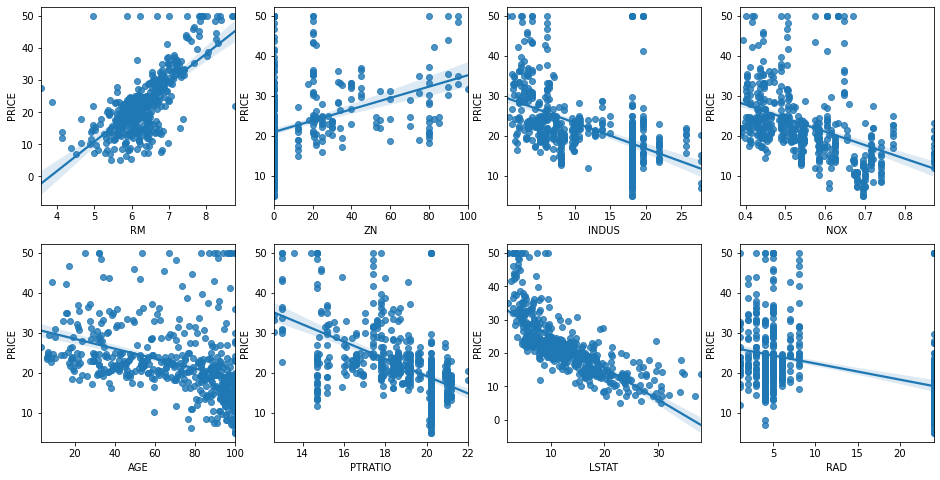

In [7]:
# 2*4 subplot 생성
# regplot -> 산점도와 회귀 직선 함께표시
# 컬럼별로 가격의 상관관계를 파악하기 위함
fig, axs = plt.subplots(figsize=(16,8) , ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row]
               [col])

## 학습과 테스트 데이터 셋으로 분리 
## 학습/예측/평가

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [11]:
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [14]:
# 선형회귀로 학습 예습 평가
lr = LinearRegression()
lr.fit(x_train ,y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [15]:
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [16]:
# 회귀계수의 갯수 13개 14개에서 price를 뺀 갯수

print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [19]:
#회귀계수를 큰 값 순으로 정렬 
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [20]:
#cross_val_score 교차검증
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

In [24]:
#5폴드셋으로 MSE를 root를 씌워서 RMSE 구함
#neg_mse_scores값이 값이 낮을 수록 우수한 모델, 반환시 음수여서 -1 곱함
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [25]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
